# Analisi dei disastri aerei dal 1919 al 2023


## Importazione delle librerie di Python utilizzate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from IPython.display import HTML

Disabilito la visualizzazione dei warning per evitare informazioni non necessarie nei risultati

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importazione dei dati

Carico il file CSV con all'interno i dati relativi agli incidenti aerei.

In [91]:
df = pd.read_csv("aviation-accidents.csv", encoding='utf-8')

## Verifica dei dati

Visualizzo il dataframe **df** che contiene i dati caricati per farmi un'idea dei dati con cui lavorerò.

In [4]:
df

date                       type registration  \
0        date unk.             Antonov An-12B       T-1206   
1        date unk.             Antonov An-12B       T-1204   
2        date unk.             Antonov An-12B       T-1201   
3        date unk.            Antonov An-12BK          NaN   
4        date unk.            Antonov An-12BP   CCCP-11815   
...            ...                        ...          ...   
23962  11-MAY-2023               Hawker 900XP       PK-LRU   
23963  11-MAY-2023  Cessna 208B Grand Caravan       PK-NGA   
23964  12-MAY-2023  Cessna 208B Grand Caravan       5X-RBR   
23965  14-MAY-2023            Boeing 747-4R7F       LX-OCV   
23966  15-MAY-2023                Learjet 35A       D-CGFQ   

                     operator fatalities             location  \
0               Indonesian AF        NaN                  NaN   
1               Indonesian AF        NaN                  NaN   
2               Indonesian AF        NaN                  NaN   
3                   Soviet AF        NaN  Tiksi Airport (IKS)   
4                   Soviet AF          0  Massawa Airport ...   
...                       ...        ...                  ...   
23962  Angkasa Super Services          0  Maleo Airport (MOH)   
23963  Nasional Global Aviasi          0    Fentheik Airstrip   
23964            Bar Aviation          0  Kampala-Kajjansi...   
23965                Cargolux          0  Luxembourg-Finde...   
23966                     GFD          2        Hohn Air Base   

               country cat     year  
0      Unknown country  U1  unknown  
1      Unknown country  U1  unknown  
2      Unknown country  U1  unknown  
3               Russia  A1  unknown  
4              Eritrea  A1  unknown  
...                ...  ..      ...  
23962        Indonesia  A2     2023  
23963        Indonesia  A2     2023  
23964           Uganda  A1     2023  
23965       Luxembourg  A2     2023  
23966          Germany  A1     2023  

[23967 rows x 9 columns]

Già da un primo sguardo si vedono delle colonne con dei dati "unknown" che saranno da verificare e sistemare

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


Dalle informazioni sul **df** risulta che tutte le colonne sono state importate come stringhe per cui andranno opportunatamente tipizzate.

In [6]:
df.isna().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

Nel **df** sono presenti colonne con dati nulli percui sarà necessario ripulire e sistemare i dati.

## Funzioni utilizzate

In [7]:
def show_and_sort_all_unique_value_of_column(column_name, current_df):
    with pd.option_context('display.max_rows', None):
        col_unique = current_df[column_name].sort_values().unique()
        df_col = pd.DataFrame(col_unique, columns=[column_name])
        print(df_col)       

In [8]:
def convert_fatalities_to_number(s):   
    
    if s=='nan':
        return int(-1)
    
    total = 0
    
    parts = s.replace(" ","").split("+")
    
    for part in parts:
        try:
            if(len(parts)>1):
                num = int(part)
                total += num
            else:
                total = int(s)
        except ValueError:
            pass
    
    return total

## Pulizia dei dati

Faccio una copia del **df** originale in cui andrò ad eseguire le operazioni di pulizia

In [9]:
df_clean = df.copy()

### Pulizia della colonna "date"

Visualizzo i valori univoci di **df** in una lista per valutare se ci sono valori da sistemare.

In [10]:
show_and_sort_all_unique_value_of_column('date',df)

              date
0      01-APR-1931
1      01-APR-1937
2      01-APR-1943
3      01-APR-1944
4      01-APR-1945
5      01-APR-1946
6      01-APR-1947
7      01-APR-1951
8      01-APR-1955
9      01-APR-1956
10     01-APR-1958
11     01-APR-1959
12     01-APR-1962
13     01-APR-1965
14     01-APR-1966
15     01-APR-1968
16     01-APR-1970
17     01-APR-1971
18     01-APR-1974
19     01-APR-1975
20     01-APR-1977
21     01-APR-1978
22     01-APR-1979
23     01-APR-1983
24     01-APR-1985
25     01-APR-1989
26     01-APR-1990
27     01-APR-1992
28     01-APR-1993
29     01-APR-1994
30     01-APR-1995
31     01-APR-1997
32     01-APR-2000
33     01-APR-2004
34     01-APR-2010
35     01-APR-2011
36     01-APR-2013
37     01-APR-2014
38     01-APR-2015
39     01-APR-2016
40     01-APR-2017
41     01-APR-2022
42     01-APR-2023
43     01-AUG-1937
44     01-AUG-1940
45     01-AUG-1942
46     01-AUG-1944
47     01-AUG-1945
48     01-AUG-1946
49     01-AUG-1948
50     01-AUG-1949
51     01-AU

Nella colonna sono presenti valori non validi come date, sono presenti delle date con il ? al posto del giorno e del mese percui sono date non valide, inoltre è presente un valore "date unk." che rappresenta date non conosciute.

Decido di forzare la conversione della colonna in formato data, forzando che in caso di errore, la data errata venga sostituita con in valore NaT (Not a Time).

In [11]:
df_clean["date"] = pd.to_datetime(df_clean["date"], format='%d-%b-%Y', errors='coerce')

Avendo eliminato le date non valide procedo a eliminare le righe che contengono una data non valida.

In [12]:
df_clean.dropna(subset = ['date'], axis=0, inplace=True)

Visualizzo i valori univoci di **df_clean** in una lista per valutare se i dati sono stati puliti correttamente.

In [13]:
show_and_sort_all_unique_value_of_column('date',df_clean)

            date
0     1919-08-02
1     1919-08-11
2     1920-02-23
3     1920-02-25
4     1920-06-30
5     1920-12-14
6     1921-01-15
7     1921-03-02
8     1921-03-04
9     1921-08-26
10    1921-09-27
11    1921-12-30
12    1922-01-22
13    1922-03-31
14    1922-04-07
15    1923-01-13
16    1923-05-14
17    1923-06-25
18    1923-07-10
19    1923-07-15
20    1923-08-27
21    1923-12-03
22    1924-01-22
23    1924-08-06
24    1924-08-24
25    1925-10-16
26    1925-11-14
27    1926-08-18
28    1926-10-02
29    1926-10-21
30    1926-11-20
31    1927-05-05
32    1927-08-22
33    1928-02-15
34    1928-03-11
35    1928-04-11
36    1928-04-19
37    1928-05-12
38    1928-05-23
39    1928-08-25
40    1928-09-25
41    1928-10-13
42    1928-11-23
43    1928-12-01
44    1928-12-11
45    1928-12-22
46    1929-01-16
47    1929-03-17
48    1929-03-19
49    1929-04-12
50    1929-04-21
51    1929-05-16
52    1929-05-19
53    1929-06-02
54    1929-06-13
55    1929-06-17
56    1929-06-24
57    1929-08-

### Pulizia della colonna "type"

Visualizzo i valori univoci di **df** in una lista per valutare se ci sono valori da sistemare.

In [14]:
show_and_sort_all_unique_value_of_column('type',df)

                                                type
0                             A.W. AW-650 Argosy 101
1                             A.W. AW-650 Argosy 102
2                             A.W. AW-650 Argosy 222
3                             A.W. AW-660 Argosy C.1
4                                A.W. AW.15 Atalanta
5                                A.W. AW.27 Ensign I
6                                     A.W. Argosy IA
7                                     A.W. Argosy II
8                                 AMI C-47TP (DC-3T)
9                                      AMI DC-3-65TP
10                                 ATECO Westwind II
11                                    ATL-98 Carvair
12                                        ATR 42-200
13                                        ATR 42-300
14                                        ATR 42-310
15                                        ATR 42-312
16                                        ATR 42-320
17                                    ATR 42-3

Uniformo la stringa relativa ai "type" non consociuti ad una stringa che sia uguale per tutti in quanto ora è presente con diciture diverse "unknown" e "unknown jetliner"

In [15]:
df_clean["type"].mask((df_clean["type"] == "unknown") | (df_clean["type"] == "unknown jetliner"), "Unknown Type", inplace=True)

Vado a pulire le stringhe da caratteri che disturbano la visualizzazione.

In [16]:
df_clean["type"] = df_clean["type"].str.strip(" ?")

Visualizzo i valori univoci di **df_clean** in una lista per valutare se i dati sono stati puliti correttamente.

In [17]:
show_and_sort_all_unique_value_of_column('type',df_clean)

                                                type
0                             A.W. AW-650 Argosy 101
1                             A.W. AW-650 Argosy 102
2                             A.W. AW-650 Argosy 222
3                             A.W. AW-660 Argosy C.1
4                                A.W. AW.15 Atalanta
5                                A.W. AW.27 Ensign I
6                                     A.W. Argosy IA
7                                     A.W. Argosy II
8                                 AMI C-47TP (DC-3T)
9                                      AMI DC-3-65TP
10                                 ATECO Westwind II
11                                    ATL-98 Carvair
12                                        ATR 42-200
13                                        ATR 42-300
14                                        ATR 42-310
15                                        ATR 42-312
16                                        ATR 42-320
17                                    ATR 42-3

### Pulizia della colonna "registration"

Visualizzo i valori univoci di **df** in una lista per valutare se ci sono valori da sistemare.

In [18]:
show_and_sort_all_unique_value_of_column('registration',df)

        registration
0          (HK-4274)
1           (N175BA)
2           (N237DX)
3           (N293WB)
4           (N326TD)
5           (N370JL)
6           (N530GA)
7           (N90460)
8           (N917TF)
9           (VH-SMJ)
10          (XB-BZH)
11          (XB-PNK)
12          (XB-PYB)
13                 -
14           .. + ..
15            ..-141
16           0-50781
17           0-52978
18           0-53277
19           0-53279
20           0-53300
21           0-53311
22           0-53313
23           0-53323
24           0-53327
25           0-81707
26           0-81717
27           0-81718
28           0-92209
29           0-92227
30           00-0173
31           00-0292
32                01
33            01 red
34             01007
35               012
36             01710
37       0187/3-T-23
38        0189/5-T-2
39               019
40             01981
41             01984
42             01988
43             01989
44             01990
45                02
46          0

Vado a pulire i dati e a uniformare i dati non validi con la stringa "Unknown Registration"

In [19]:
df_clean["registration"].mask(df_clean["registration"] == "..-141", "141", inplace=True)

In [20]:
df_clean["registration"].mask(df_clean["registration"] == "-", "Unknown Registration", inplace=True)

In [21]:
df_clean["registration"].mask(df_clean["registration"] == ".. + ..", "Unknown Registration", inplace=True)

In [22]:
df_clean["registration"].mask(df_clean["registration"] == "fake reg.", "Unknown Registration", inplace=True)

In [23]:
df_clean["registration"].mask(df_clean["registration"] == "false reg.", "Unknown Registration", inplace=True)

In [24]:
df_clean["registration"].mask(df_clean["registration"] == "no reg.", "Unknown Registration", inplace=True)

In [25]:
df_clean["registration"].mask(df_clean["registration"] == "unreg.", "Unknown Registration", inplace=True)

In [26]:
df_clean["registration"].mask(df_clean["registration"].isna(), "Unknown Registration", inplace=True)

Vado a pulire le stringhe da caratteri che disturbano la visualizzazione.

In [27]:
df_clean["registration"] = df_clean["registration"].str.strip(" ()[]")

Visualizzo i valori univoci di **df_clean** in una lista per valutare se i dati sono stati puliti correttamente.

In [28]:
show_and_sort_all_unique_value_of_column('registration',df_clean)

               registration
0                   0-50781
1                   0-52978
2                   0-53277
3                   0-53279
4                   0-53300
5                   0-53311
6                   0-53313
7                   0-53323
8                   0-53327
9                   0-81707
10                  0-81717
11                  0-81718
12                  0-92209
13                  0-92227
14                  00-0173
15                  00-0292
16                       01
17                    01007
18                      012
19                    01710
20              0187/3-T-23
21               0189/5-T-2
22                      019
23                    01981
24                    01984
25                    01988
26                    01989
27                    01990
28                       02
29                 02 white
30              0232/CTA-23
31                      026
32             0260/2-Gt-19
33               0277/CTA-5
34              0281

### Pulizia della colonna "operator"

Visualizzo i valori univoci di **df** in una lista per valutare se ci sono valori da sistemare.

In [29]:
show_and_sort_all_unique_value_of_column('operator',df)

                                               operator
0                                       , op.for GoJump
1                    , op.for Tlaxcala State Government
2                                           , op.for UN
3                                            09 Charlie
4                                          1982-047 LLC
5                                            2M Leasing
6              2nd Arkhangelsk United Aviation Division
7                    2nd Sverdlovsk Aviation Enterprise
8                                           40-Mile Air
9                                      748 Air Services
10                                      987 Investments
11                                              A & AEE
12                                 A & H Aircraft Sales
13         A&C Big Sky Aviation, opb Trans-Pacific Jets
14                       A.E. Stanley Manufacturing Co.
15                                           A.R. Wings
16                                      AAA Inve

Vado a pulire i dati e a uniformare i dati non validi con la stringa "Unknown Operator"

In [30]:
df_clean["operator"] = df_clean["operator"].fillna("Unknown Operator")

Vado a sistemare l'ecoding del testo per visualizzare correttamente le stringhe

In [31]:
df_clean['operator'] = df_clean['operator'].apply(lambda x: str(x).encode('latin1', 'ignore').decode('utf-8', 'ignore'))

Vado a pulire le stringhe da caratteri che disturbano la visualizzazione.

In [32]:
df_clean["operator"] = df_clean["operator"].str.strip(" ,")

Visualizzo i valori univoci di **df_clean** in una lista per valutare se i dati sono stati puliti correttamente.

In [33]:
show_and_sort_all_unique_value_of_column('operator',df_clean)

                                               operator
0                                            09 Charlie
1                                          1982-047 LLC
2                                            2M Leasing
3              2nd Arkhangelsk United Aviation Division
4                    2nd Sverdlovsk Aviation Enterprise
5                                           40-Mile Air
6                                      748 Air Services
7                                       987 Investments
8                                               A & AEE
9                                  A & H Aircraft Sales
10         A&C Big Sky Aviation, opb Trans-Pacific Jets
11                       A.E. Stanley Manufacturing Co.
12                                           A.R. Wings
13                                      AAA Investments
14                                     AB Aerotransport
15                                          AB Aviation
16                                  AB TT-Transp

### Pulizia della colonna "fatalities"

Visualizzo i valori univoci di **df** in una lista per valutare se ci sono valori da sistemare.

In [34]:
show_and_sort_all_unique_value_of_column('fatalities',df)

    fatalities
0            0
1         0+ 1
2        0+ 10
3         0+ 2
4        0+ 23
5       0+ 237
6         0+ 3
7         0+ 4
8         0+ 6
9         0+ 7
10        0+ 8
11           1
12        1+ 1
13        1+ 2
14        1+ 3
15       1+ 32
16        1+ 4
17        1+ 5
18        1+ 9
19          10
20       10+ 1
21      10+ 24
22       10+ 3
23         100
24     100+ 49
25         101
26         102
27         103
28         104
29         105
30         106
31         107
32         108
33         109
34      109+ 4
35          11
36       11+ 1
37      11+ 13
38       11+ 3
39         110
40      110+ 4
41         111
42         112
43         113
44         114
45         115
46         116
47         117
48         118
49         119
50          12
51       12+ 1
52         121
53         122
54     122+ 17
55         123
56         124
57      124+ 1
58         125
59         126
60     126+ 24
61         127
62         128
63         129
64          13
65       1

Vado a pulire i dati e a uniformare i dati non validi, nello specifico ho creato una funzione per convertire le righe che hanno un valore del tipo "1+ 99" in un numero intero dato dalla somma dei due numeri, se invece il valore presente nella cella non è valido lo sostituisco con "-1" in modo da poterlo poi gestire nello step successivo.

In [35]:
df_clean["fatalities"] = df_clean["fatalities"].apply(lambda x: convert_fatalities_to_number(str(x)))

Faccio la media delle "fatalities" per riempire i dati che hanno valore -1, cioè i valori non validi trovati nello step precedente.

In [36]:
df_clean["fatalities"].mask(df_clean["fatalities"]==-1, int(df_clean["fatalities"].mean()), inplace=True)

Visualizzo i valori univoci di **df_clean** in una lista per valutare se i dati sono stati puliti correttamente.

In [37]:
show_and_sort_all_unique_value_of_column('fatalities',df_clean)

     fatalities
0             0
1             1
2             2
3             3
4             4
5             5
6             6
7             7
8             8
9             9
10           10
11           11
12           12
13           13
14           14
15           15
16           16
17           17
18           18
19           19
20           20
21           21
22           22
23           23
24           24
25           25
26           26
27           27
28           28
29           29
30           30
31           31
32           32
33           33
34           34
35           35
36           36
37           37
38           38
39           39
40           40
41           41
42           42
43           43
44           44
45           45
46           46
47           47
48           48
49           49
50           50
51           51
52           52
53           53
54           54
55           55
56           56
57           57
58           58
59           59
60           60
61      

### Pulizia della colonna "location"

Visualizzo i valori univoci di **df** in una lista per valutare se ci sono valori da sistemare.

In [38]:
show_and_sort_all_unique_value_of_column('location',df)

                         location
0                  's Gravenzande
1                        't Woudt
2             24 Mayo Airstrip...
3             40 nm S of Toron...
4                   ??Cape Kibera
5                          A Loui
6                            A Ro
7             Aakenustunturi, ...
8             Aalborg Airport ...
9                    Aalborg West
10             Aalborg West Ai...
11                       Aalsmeer
12            Aarhus Airport (...
13            Aarhus-Tirstrup ...
14                         Abadan
15            Abadan Airport (...
16                         Abarqu
17            Abbotsford Airpo...
18              Aberdeen Airstrip
19            Aberdeen Municip...
20                   Aberdeen, MS
21            Aberdeen-Dyce Ai...
22            Abha Internation...
23                        Abidjan
24            Abidjan Airport ...
25            Abidjan-Felix Ho...
26            Abilene-Dyess AF...
27            Abiline-Dyess AF...
28            

Vado a sistemare l'ecoding del testo per visualizzare correttamente le stringhe

In [39]:
df_clean['location'] = df_clean['location'].apply(lambda x: str(x).encode('latin1','ignore').decode('utf-8', 'ignore'))

Vado a pulire le stringhe da caratteri che disturbano la visualizzazione.

In [40]:
df_clean["location"] = df_clean["location"].str.strip(" .,()?")

Visualizzo i valori univoci di **df_clean** in una lista per valutare se i dati sono stati puliti correttamente.

In [41]:
show_and_sort_all_unique_value_of_column('location',df_clean)

                         location
0                  's Gravenzande
1                        't Woudt
2                24 Mayo Airstrip
3                40 nm S of Toron
4                            A Ro
5                  Aakenustunturi
6                 Aalborg Airport
7                    Aalborg West
8                 Aalborg West Ai
9                        Aalsmeer
10                 Aarhus Airport
11                Aarhus-Tirstrup
12                         Abadan
13                 Abadan Airport
14                         Abarqu
15               Abbotsford Airpo
16              Aberdeen Airstrip
17               Aberdeen Municip
18                   Aberdeen, MS
19               Aberdeen-Dyce Ai
20               Abha Internation
21                        Abidjan
22                Abidjan Airport
23               Abidjan-Felix Ho
24               Abilene-Dyess AF
25               Abiline-Dyess AF
26               Abingdon RAF Sta
27               Abingdon-RAF Sta
28            

### Pulizia della colonna "country"

Visualizzo i valori univoci di **df** in una lista per valutare se ci sono valori da sistemare.

In [42]:
show_and_sort_all_unique_value_of_column('country',df)

                  country
0                       ?
1             Afghanistan
2                 Albania
3                 Algeria
4          American Samoa
5                  Angola
6                Anguilla
7              Antarctica
8                 Antigua
9            Arctic Ocean
10              Argentina
11                Armenia
12                  Aruba
13         Atlantic Ocean
14              Australia
15                Austria
16             Azerbaijan
17                 B.V.I.
18                Bahamas
19                Bahrain
20             Bangladesh
21               Barbados
22                Belarus
23                Belgium
24                 Belize
25                  Benin
26                Bermuda
27                 Bhutan
28                Bolivia
29                 Bosnia
30               Botswana
31                 Brazil
32               Bulgaria
33           Burkina Faso
34                Burundi
35                 C.A.R.
36               Cambodia
37          

Vado a pulire i dati e a uniformare i dati non validi con la stringa "Unknown Country"

In [43]:
df_clean["country"].mask(df_clean["country"] == "?", "Unknown Country", inplace=True)
df_clean["country"].mask(df_clean["country"] == "Unknown country", "Unknown Country", inplace=True)

Visualizzo i valori univoci di **df_clean** in una lista per valutare se i dati sono stati puliti correttamente.

In [44]:
show_and_sort_all_unique_value_of_column('country',df_clean)

                  country
0             Afghanistan
1                 Albania
2                 Algeria
3          American Samoa
4                  Angola
5                Anguilla
6              Antarctica
7                 Antigua
8            Arctic Ocean
9               Argentina
10                Armenia
11                  Aruba
12         Atlantic Ocean
13              Australia
14                Austria
15             Azerbaijan
16                 B.V.I.
17                Bahamas
18                Bahrain
19             Bangladesh
20               Barbados
21                Belarus
22                Belgium
23                 Belize
24                  Benin
25                Bermuda
26                 Bhutan
27                Bolivia
28                 Bosnia
29               Botswana
30                 Brazil
31               Bulgaria
32           Burkina Faso
33                Burundi
34                 C.A.R.
35               Cambodia
36               Cameroon
37          

### Pulizia della colonna "cat"

Visualizzo i valori univoci di **df** in una lista per valutare se ci sono valori da sistemare.

In [45]:
show_and_sort_all_unique_value_of_column('cat',df)

   cat
0   A1
1   A2
2   C1
3   C2
4   H1
5   H2
6   I1
7   I2
8   O1
9   O2
10  U1


Nulla da eseguire su questa colonna in quanto già va bene così.

### Pulizia della colonna "year"

Visualizzo i valori univoci di **df** in una lista per valutare se ci sono valori da sistemare.

In [46]:
show_and_sort_all_unique_value_of_column('year',df)

        year
0       1919
1       1920
2       1921
3       1922
4       1923
5       1924
6       1925
7       1926
8       1927
9       1928
10      1929
11      1930
12      1931
13      1932
14      1933
15      1934
16      1935
17      1936
18      1937
19      1938
20      1939
21      1940
22      1941
23      1942
24      1943
25      1944
26      1945
27      1946
28      1947
29      1948
30      1949
31      1950
32      1951
33      1952
34      1953
35      1954
36      1955
37      1956
38      1957
39      1958
40      1959
41      1960
42      1961
43      1962
44      1963
45      1964
46      1965
47      1966
48      1967
49      1968
50      1969
51      1970
52      1971
53      1972
54      1973
55      1974
56      1975
57      1976
58      1977
59      1978
60      1979
61      1980
62      1981
63      1982
64      1983
65      1984
66      1985
67      1986
68      1987
69      1988
70      1989
71      1990
72      1991
73      1992
74      1993
75      1994

Per l'anno i valori sono già corretti percui procedo esclusivamente a convertire i valori in "int".

In [47]:
df_clean["year"] = df_clean["year"].astype('int')

## Dati puliti e pronti per l'analisi

Resetto gli indici del dataframe pulito **df_clean**

In [48]:
df_clean = df_clean.reset_index(drop=True)

Visualizzo il dataframe pulito **df_clean**

In [49]:
df_clean

date                       type          registration  \
0     1919-08-02              Caproni Ca.48  Unknown Registration   
1     1919-08-11            Felixstowe Fury                  N123   
2     1920-02-23           Handley Page O/7                G-EANV   
3     1920-02-25         Handley Page O/400                G-EAMC   
4     1920-06-30         Handley Page O/400                G-EAKE   
...          ...                        ...                   ...   
23403 2023-05-11               Hawker 900XP                PK-LRU   
23404 2023-05-11  Cessna 208B Grand Caravan                PK-NGA   
23405 2023-05-12  Cessna 208B Grand Caravan                5X-RBR   
23406 2023-05-14            Boeing 747-4R7F                LX-OCV   
23407 2023-05-15                Learjet 35A                D-CGFQ   

                     operator  fatalities             location       country  \
0                     Caproni          14               Verona         Italy   
1                         RAF           1  near Felixtowe RNAS          U.K.   
2      Handley Page Transport           0     Acadia Siding, C  South Africa   
3      Handley Page Transport           0      near El Shereik         Sudan   
4      Handley Page Transport           0               Östanå        Sweden   
...                       ...         ...                  ...           ...   
23403  Angkasa Super Services           0   Maleo Airport (MOH     Indonesia   
23404  Nasional Global Aviasi           0    Fentheik Airstrip     Indonesia   
23405            Bar Aviation           0     Kampala-Kajjansi        Uganda   
23406                Cargolux           0     Luxembourg-Finde    Luxembourg   
23407                     GFD           2        Hohn Air Base       Germany   

      cat  year  
0      A1  1919  
1      A1  1919  
2      A1  1920  
3      A1  1920  
4      A1  1920  
...    ..   ...  
23403  A2  2023  
23404  A2  2023  
23405  A1  2023  
23406  A2  2023  
23407  A1  2023  

[23408 rows x 9 columns]

Controllo le informazioni su **df_clean** e adesso le colonne hanno il corretto tipo di dati.

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23408 entries, 0 to 23407
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          23408 non-null  datetime64[ns]
 1   type          23408 non-null  object        
 2   registration  23408 non-null  object        
 3   operator      23408 non-null  object        
 4   fatalities    23408 non-null  int64         
 5   location      23408 non-null  object        
 6   country       23408 non-null  object        
 7   cat           23408 non-null  object        
 8   year          23408 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.6+ MB


Controllo i valori nulli in **df_clean** e come mi aspettavano ora non sono presenti valori nulli nelle colonne.

In [51]:
df_clean.isna().sum()

date            0
type            0
registration    0
operator        0
fatalities      0
location        0
country         0
cat             0
year            0
dtype: int64

# ANALISI DEI DATI

## In quale nazione si sono verificati più incidenti?

Conto quanti incidenti si sono verificati per ogni nazione.

In [52]:
country_series = df_clean["country"].value_counts().sort_values(ascending=False)

Visualizzo una tabella con le prime dieci nazioni per numero di incidenti.

In [53]:
df_country = pd.DataFrame(list(country_series.items()),columns=['Nazione', 'Incidenti'])
df_country.head(10)

Nazione  Incidenti
0              USA       4355
1           Russia       1366
2             U.K.        835
3           Canada        820
4  Unknown Country        739
5            India        696
6           Brazil        606
7           France        541
8            China        508
9          Germany        502

Creo un grafico a barre con i dati della tabella precedente per avere un migliore visione dei dati.

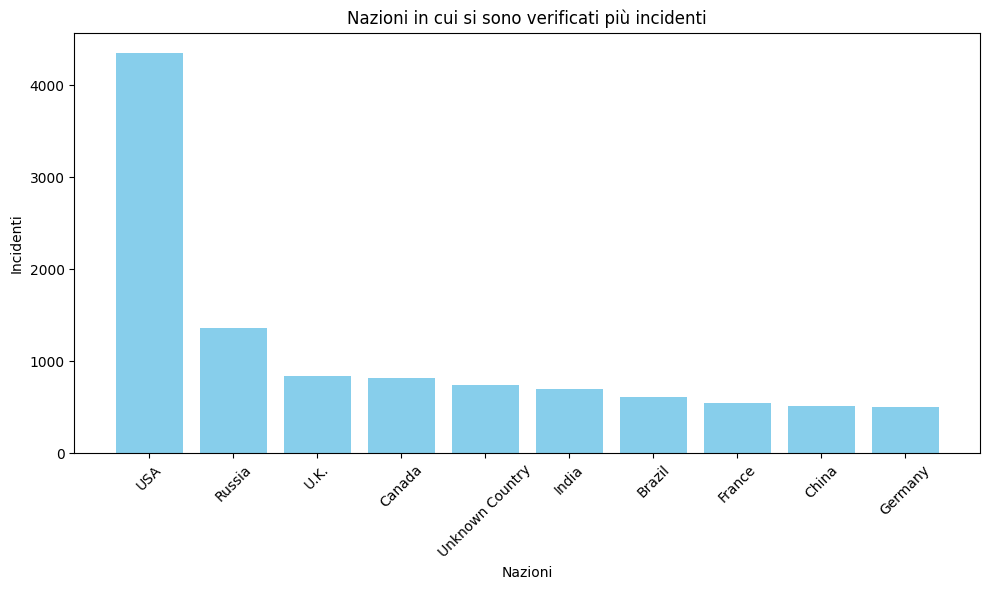

In [54]:
df_country_top10 = df_country.head(10)

countries = df_country_top10["Nazione"]
accidents = df_country_top10['Incidenti']

plt.figure(figsize=(10, 6))
plt.bar(countries, accidents, color='skyblue')
plt.xlabel('Nazioni')
plt.ylabel('Incidenti')
plt.title('Nazioni in cui si sono verificati più incidenti')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Visualizzo tutti i dati sugli incidenti per nazione su una mappa per valutare la distribuzione degli stessi nel mondo.

In [55]:
df_country_map = df_country.copy();

In [56]:
# Per USA e UK sostituisco i nomi degli stati con il nome completo per poterli visualizzare correttamente sulla mappa
df_country_map.loc[0, "Nazione"] = "United States of America"
df_country_map.loc[3, "Nazione"] = "United Kingdom"

In [57]:
# Carico il dataset del mondo usando GeoPandas
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unisco il DataFrame dei dati sugli incidenti con il DataFrame del mondo basato
df_world_accidents = df_world.merge(df_country_map, how='left', left_on='name', right_on='Nazione')

# Riempio i valori nulli con 0 perchè altrimenti la mappa non viene creata correttamente
df_world_accidents['Incidenti'].fillna(value=0,inplace=True)

In [58]:
# Carico la mappa colori da usare nella mappa
orig_map=plt.cm.get_cmap('gist_heat') 
  
# Iverto la mappa colori per avere i colori scuri a identificare il numero più alto di incidenti
reversed_map = orig_map.reversed()

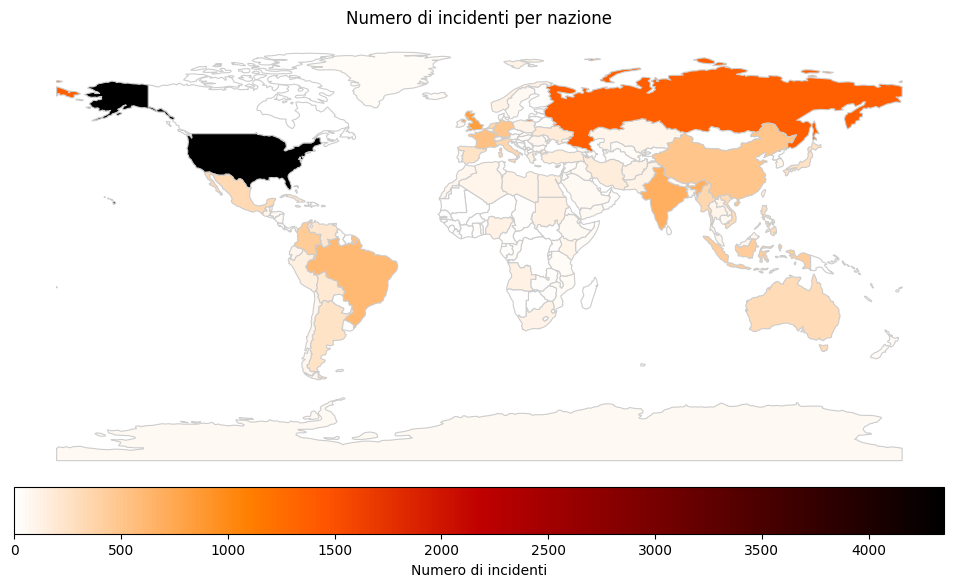

In [59]:
# Configurazione della mappa del mondo e colorazione delle nazioni in base al numero di incidenti
fig, ax = plt.subplots(figsize=(12, 8))
df_world_accidents.plot(column='Incidenti', cmap=reversed_map, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={"label": "Numero di incidenti","orientation": "horizontal", "pad": 0.01} )
ax.set_title('Numero di incidenti per nazione')
ax.set_axis_off()

# Mostro la mappa
plt.show()

Dai dati estratti e da quanto rappresentato nei grafici la nazione in cui si sono verificati più incidenti sono gli **Stati Uniti d'America (USA)**, questo protrebbe essere dovuto dalla dimensione del paese, ma non può essere il solo punto in quanto altri paesi di grandi dimensioni hanno meno incidenti aerei come ad esempio la Russia, il cui numero minore di incidenti può dipendere dal fatto che nel proprio territorio ha zone poco abitate e quindi poco fornite di aereoporti come in alcune aree della Siberia.

Un'altro fattore è che gli Stati Uniti hanno un sistema di trasporto aereo molto trafficato, che include una vasta reste di aereoporti, di aree di controllo del traffico aereo e regolamenti e proceudere complesse che possono comportare una maggiore probabilità di errori umani, guasti tecnici e altri generi di incidenti.

## Gli incidenti avvengono più di frequente durante determinati giorni della settimana?


Definisco i nomi dei giorni della settimana.

In [60]:
weekday_names = {
    0: 'Lunedì',
    1: 'Martedì',
    2: 'Mercoledì',
    3: 'Giovedì',
    4: 'Venerdì',
    5: 'Sabato',
    6: 'Domenica'
}

Estraggo dalla colonna "date" i giorni della settimana in cui si sono verificati gli incidenti.

In [61]:
arr_day_from_date = pd.arrays.DatetimeArray(df_clean["date"]).weekday

Creo un dizionario che contiene per ognuno dei 7 giorni della settimana il numero totale di incidenti che si sono verificati.

In [62]:
dict_weekday = {}

for num_day_of_week in arr_day_from_date:
    if num_day_of_week in dict_weekday:
        dict_weekday[num_day_of_week] += 1
    else:
        dict_weekday[num_day_of_week] = 1

Sostituisco il numero che rappresenta il giorno della settinama con il rispettivo nome.

In [63]:
dict_weekday = {weekday_names[k]: v for k, v in dict_weekday.items()}

Visualizzo una tabella degli incidenti per giorno della settimana.

In [64]:
df_weekday = pd.DataFrame(list(dict_weekday.items()), columns=['Giorni', 'Incidenti'])
df_weekday = df_weekday.sort_values(by='Incidenti', ascending=False)
df_weekday

Giorni  Incidenti
4    Venerdì       3701
6    Giovedì       3516
2  Mercoledì       3491
3    Martedì       3444
1     Lunedì       3317
0     Sabato       3186
5   Domenica       2753

Visualizzo i dati della tabella in un grafico a barre.

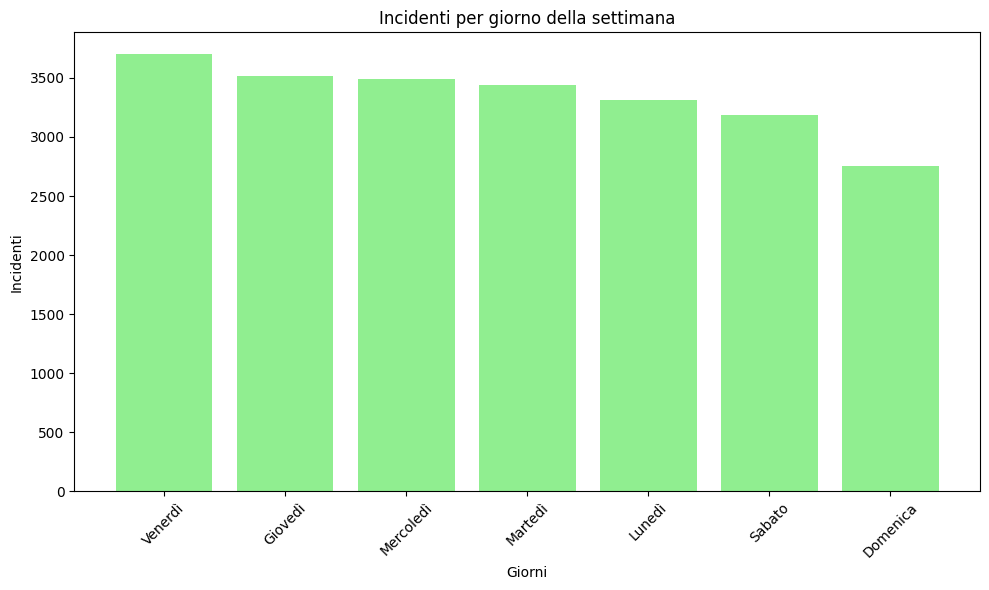

In [65]:
days = df_weekday['Giorni']
accidents_for_day = df_weekday['Incidenti']

plt.figure(figsize=(10, 6))
plt.bar(days, accidents_for_day, color='lightgreen')
plt.xlabel('Giorni')
plt.ylabel('Incidenti')
plt.title('Incidenti per giorno della settimana')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Si nota che si sono verificati più incidenti il **venerdì** e questo potrebbe dipendere dal fatto che nel fine settimana ci sono più voli turistici e voli privati, oltre all'eventualità che ci possano essere eventi come gare di volo, paracadutismo e voli di intrattenimento che vanno ad aumentare il traffico aereo e la probabilità che ci siano incidenti.

## Quali sono gli operatori più sicuri?

Conto quanti incidenti ha fatto ogni operatore.

In [66]:
operator_series = df_clean["operator"].value_counts().sort_values(ascending=True)

In [67]:
df_operator = pd.DataFrame(list(operator_series.items()),columns=['Operatori', 'Incidenti'])

Filtro gli operatori in modo da ottenere solo quelli più sicuri che hanno 1 solo indicidente.

In [68]:
df_operator = df_operator.query('Incidenti <= 1').sort_values(by='Operatori', ascending=True)


Calcolo quanti sono gli operatori sicuri.

In [69]:
total_secure_operator = df_operator["Operatori"].count()

Visualizzo un elenco degli operatori più sicuri (cioè quelli con 1 solo incidente).

In [70]:
html_str = f'<h3>Elenco dei <strong>{total_secure_operator}</strong> opertori più sicuri</h3>'

html_str += '<p>Questi operatori hanno avuto 1 solo incidente nel periodo di riferimento:</p>'

html_str += '<ul>'

for index, row in df_operator.iterrows():
    html_str += f'<li>{row["Operatori"]}</li>'
    
html_str += '</ul>'

display(HTML(html_str))

## Quali sono gli operatori meno sicuri?

In [71]:
insicure_operator_series = df_clean["operator"].value_counts().sort_values(ascending=False)

In [72]:
df_insicure_operator = pd.DataFrame(list(insicure_operator_series.items()),columns=['Operatori', 'Incidenti'])
df_insicure_operator.head(10)

Operatori  Incidenti
0       USAAF       2590
1        USAF       1118
2         RAF        916
3     US Navy        740
4   German AF        463
5     private        291
6    Aeroflot        194
7     Unknown        165
8  Air France        137
9        RAAF        130

Visualizziamo i dati in un grafico a barre per maggior chiarezza.

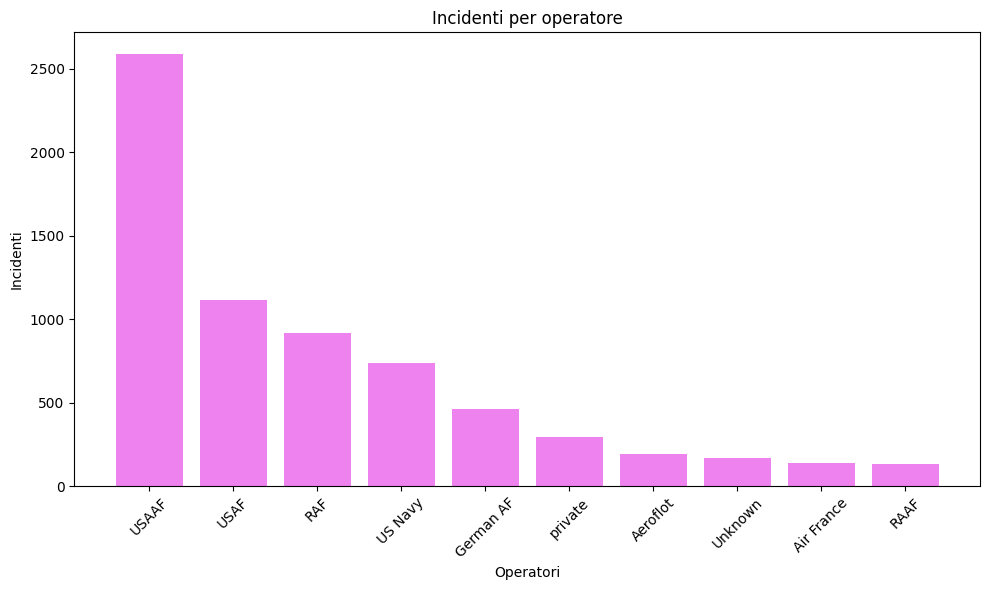

In [73]:
df_insicure_operator_top10 = df_insicure_operator.head(10)

operators = df_insicure_operator_top10['Operatori']
accidents_for_operator = df_insicure_operator_top10['Incidenti']

plt.figure(figsize=(10, 6))
plt.bar(operators, accidents_for_operator, color='violet')
plt.xlabel('Operatori')
plt.ylabel('Incidenti')
plt.title('Incidenti per operatore')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Si può notare che i primi operatori meno sicuri sono **USAF** (United States Air Force), **USAAF** (United States Army Air Forces), **RAF** (Royal Air Force), **US Navy** (Marina degli stati uniti) e **German AF** (Forze Aeree Tedesche), cioè aerei militari che potrebbero essere stati coinvolti in incidenti in situazioni di guerra e per cui si può dedurre che la maggior parte degli incidenti aerei è di tipo militare e sono meno frequenti in ambito civile.

## Quale tipo di velivolo ha causato più morti?

Sommo il numero di morti per ogni velivolo.

In [74]:
type_fat_series = df_clean[["type","fatalities"]].groupby("type")["fatalities"].sum().sort_values(ascending=False)

Visualizzo i dati in una tabella.

In [75]:
df_type_fat = pd.DataFrame(list(type_fat_series.items()),columns=['Velivolo', 'Morti'])

In [76]:
df_type_fat.head(10)

Velivolo  Morti
0  Douglas C-47A (DC-3)   9765
1   Douglas C-47 (DC-3)   3980
2  Douglas C-47B (DC-3)   3127
3         Curtiss C-46A   2469
4      Junkers Ju-52/3m   2150
5         Curtiss C-46D   1883
6      Boeing 767-223ER   1692
7       Tupolev Tu-154M   1600
8               DC-9-32   1441
9       Ilyushin Il-18V   1366

Creo un grafico a barre per una migliore comprensione.

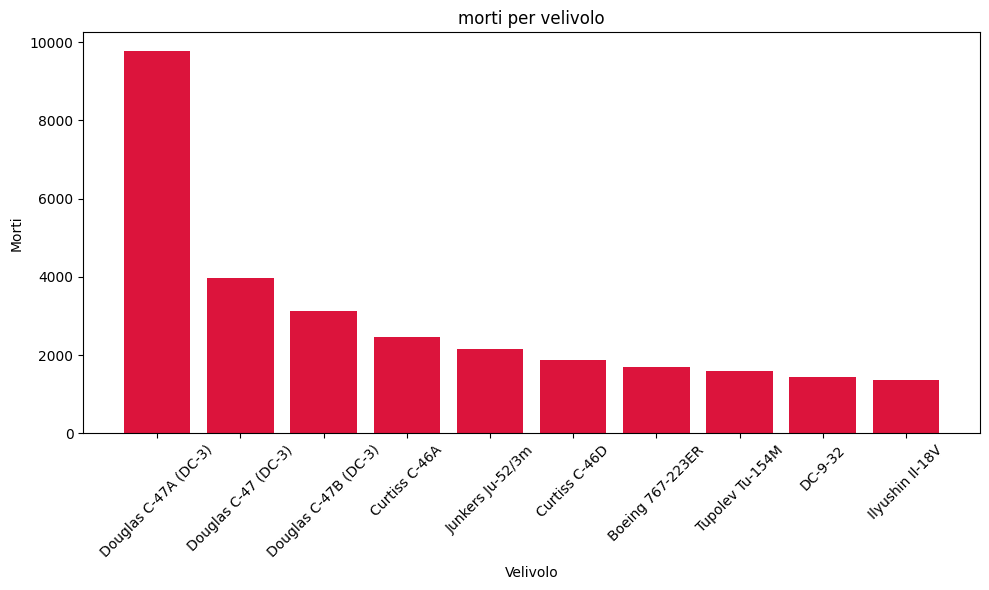

In [77]:
df_type_fat_top10 = df_type_fat.head(10)

vtype = df_type_fat_top10['Velivolo']
dead = df_type_fat_top10['Morti']

plt.figure(figsize=(10, 6))
plt.bar(vtype, dead, color='crimson')
plt.xlabel('Velivolo')
plt.ylabel('Morti')
plt.title('morti per velivolo')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Il velivolo **Douglas C-47A (DC-3)** ha causato il maggior numero di morti nel periodo di riferimento e si può notare che insieme al secondo **Douglas C-47 (DC-3)** e al terzo **Douglas C-47B (DC-3)**, sono tutti aerei militari percui la maggior mortalità dipende anche dal tipo di utilizzo del velivolo.

## Come si sono evoluti gli incidenti dopo l'11 Settembre?

Conto il numero di incidenti per anno.

In [78]:
year_series = df_clean["year"].value_counts()

In [79]:
df_year = pd.DataFrame(list(year_series.items()),columns=['Anni', 'Incidenti'])

Prendo solo gli incidenti dal 2001 in poi.

In [80]:
after_11_set = df_year.query('Anni >= 2001').sort_values(by='Anni', ascending=True)

Realizzo un grafico per visualizzare la tendenza degli incidenti dopo l'11 Settembre 2001.

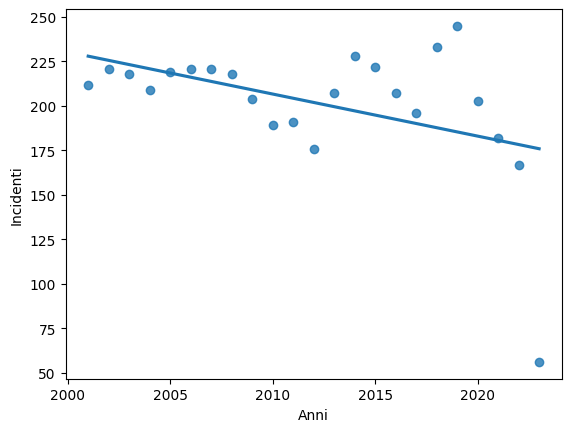

In [81]:
sns.regplot(x="Anni", y="Incidenti", data=after_11_set, ci=None);

plt.show()

Dalla tendenza si vede che dal 11 Settembre 2001 gli incidenti sono andati a diminuire, questo potrebbe essere dovuto al fatto che dopo gli attacchi terroristici c'è stato un miglioramento della sicurezza per proteggere i voli ed è aumentata la collaborazione internazionale tra le autorità aereonatiche che hanno elevato la sicurezza dei voli in tutto il mondo.

## Qual'è l'andamento degli incidenti negli anni?

Conto il numero di incidenti per anno.

In [82]:
time_series = df_clean["year"].value_counts()

In [83]:
df_time = pd.DataFrame(list(time_series.items()),columns=['Anni', 'Incidenti']).sort_values(by='Anni', ascending=True)

Visualizzo i dati su un grafico a linee

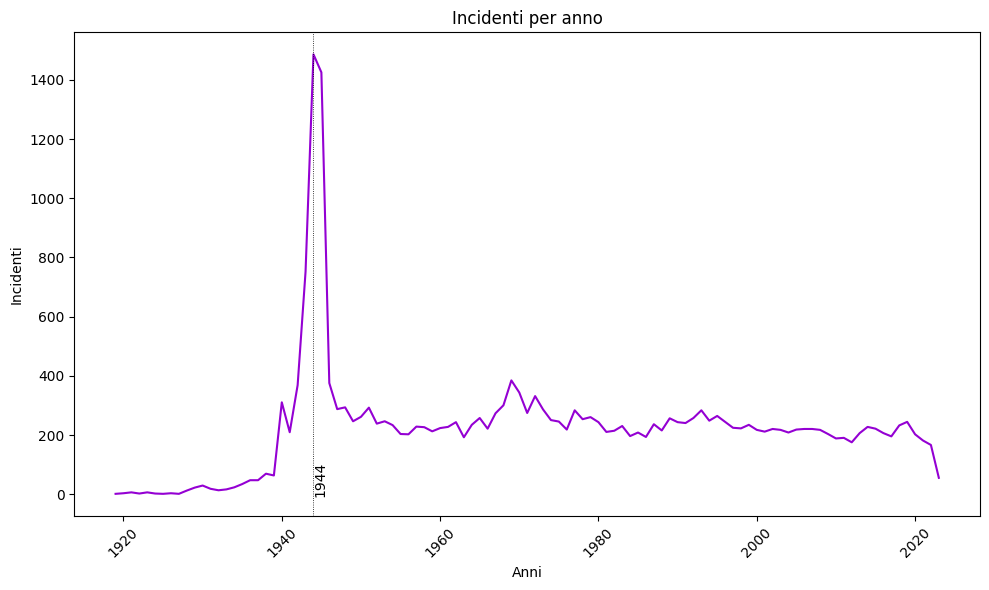

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(df_time["Anni"], df_time['Incidenti'], color='darkviolet')
plt.xlabel('Anni')
plt.ylabel('Incidenti')
plt.title('Incidenti per anno')
plt.xticks(rotation=45)
plt.tight_layout()

# visualizzo una linea verticale in corrispondenza dell'anno con più incidenti
max_accidents = df_time.loc[:, 'Incidenti'].max()
year_max_accidents = df_time.loc[df_time['Incidenti'] == max_accidents, 'Anni'].iloc[0]
plt.axvline(x=year_max_accidents, ymin=0, ymax=1, color='black', linewidth=0.6, linestyle=':')
plt.text(year_max_accidents,0,year_max_accidents,rotation=90)

plt.show()

Il maggior numero di incidenti si è verificato nel **1944** durante la seconda guerra mondiale, questa informazione unita ai dati precedenti sugli operatori meno sicuri e sui veivoli con maggior numero di morti fa intendere che la maggior parte degli incidenti si è verificato prevalentemente su veivoli militari durante la seconda guerra mondiale.

## Quali categorie di incidenti si sono verificati più spesso?

Per ogni categoria ho cercato il significato tramite i dati messi a disposizione dall'**Agenzia Nazionale per la Sicurezza dei Trasporti (ANST)**.

In [85]:
accident_type_descriptions = {
    'A1': 'Incidente senza vittime e con danni minimi al velivolo.',
    'A2': 'Incidente senza vittime e con danni sostanziali al velivolo.',
    'C1': 'Incidente con feriti lievi e danni minimi al velivolo.',
    'C2': 'Incidente con feriti lievi e danni sostanziali al velivolo.',
    'H1': 'Incidente con feriti gravi e danni minimi al velivolo.',
    'H2': 'Incidente con feriti gravi e danni sostanziali al velivolo.',
    'I1': 'Incidente con vittime fatali e danni minimi al velivolo.',
    'I2': 'Incidente con vittime fatali e danni sostanziali al velivolo.',
    'O1': 'Incidente con danni minimi al velivolo e senza ulteriori dettagli disponibili.',
    'O2': 'Incidente con danni sostanziali al velivolo e senza ulteriori dettagli disponibili.',
    'U1': 'Incidente con un solo velivolo coinvolto.'
}

Conto il numero di incidenti per ogni categoria.

In [86]:
cat_series = df_clean["cat"].value_counts()

In [87]:
df_cat = pd.DataFrame(list(cat_series.items()),columns=['Categoria', 'Incidenti']).sort_values(by='Incidenti', ascending=False)

Abbino la categoria alla relativa descrizione.

In [88]:
pd.set_option('display.max_colwidth', 150)
df_cat['Descrizione'] = df_cat["Categoria"].apply(lambda cod_cat: accident_type_descriptions[cod_cat])

df_cat

Categoria  Incidenti  \
0         A1      17127   
1         A2       2488   
2         C1       1157   
3         H2       1051   
4         O1        954   
5         U1        427   
6         C2         83   
7         O2         64   
8         H1         42   
9         I2         12   
10        I1          3   

                                                                            Descrizione  
0                               Incidente senza vittime e con danni minimi al velivolo.  
1                          Incidente senza vittime e con danni sostanziali al velivolo.  
2                                Incidente con feriti lievi e danni minimi al velivolo.  
3                           Incidente con feriti gravi e danni sostanziali al velivolo.  
4        Incidente con danni minimi al velivolo e senza ulteriori dettagli disponibili.  
5                                             Incidente con un solo velivolo coinvolto.  
6                           Incidente con feriti lievi e danni sostanziali al velivolo.  
7   Incidente con danni sostanziali al velivolo e senza ulteriori dettagli disponibili.  
8                                Incidente con feriti gravi e danni minimi al velivolo.  
9                         Incidente con vittime fatali e danni sostanziali al velivolo.  
10                             Incidente con vittime fatali e danni minimi al velivolo.

Creo una tabella in cui vengono aggregate le categorie con meno di 100 incidenti per visualizzare in modo migliore il grafico.

In [89]:
df_cat_pie = df_cat.copy();

threshold = 100

# Creo una nuova colonna che aggrega le categorie con meno incidenti
df_cat_pie['Categoria'] = df_cat_pie.apply(lambda row: 'Altre' if row['Incidenti'] < threshold else row['Categoria'], axis=1)

# Raggruppo per la nuova colonna e sommo gli indicidenti delle righe aggregate
df_cat_pie_merged = df_cat_pie.groupby('Categoria', as_index=False)['Incidenti'].sum()

df_cat_pie_merged.sort_values(by='Incidenti', ascending=False)

Categoria  Incidenti
0        A1      17127
1        A2       2488
3        C1       1157
4        H2       1051
5        O1        954
6        U1        427
2     Altre        204

Visualizzo il grafico con i dati ottenuti.

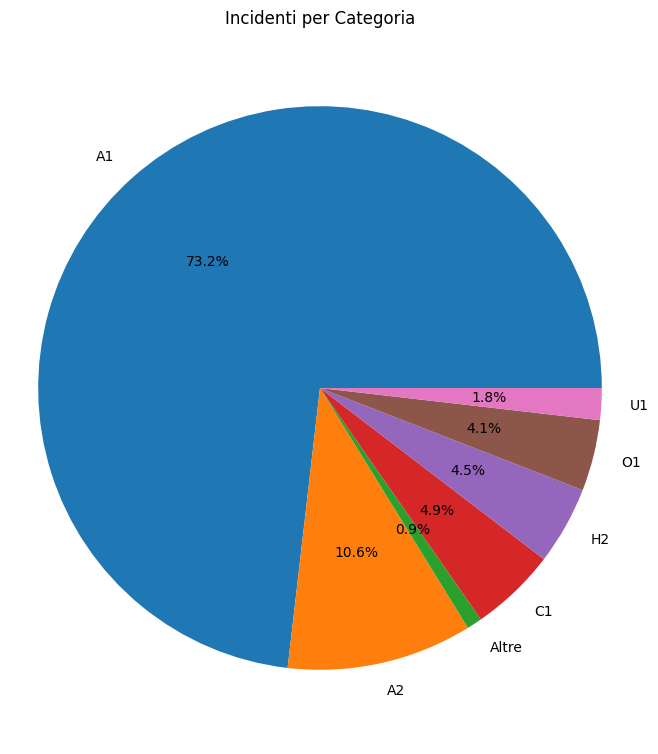

In [90]:
plt.figure(figsize=(8, 8))
plt.pie(df_cat_pie_merged['Incidenti'], labels=df_cat_pie_merged['Categoria'], autopct='%1.1f%%', startangle=0)
plt.title('Incidenti per Categoria')

# Per spaziare il grafico dal titolo
plt.subplots_adjust(top=1) 

# Per mantenere il grafico a torta circolare
plt.axis('equal')

plt.show()

Le due categorie con maggior numero di incidenti **A1** e **A2** sono entrambe categorie in cui non si sono verificati morti ne feriti, percui si può dedurre che la maggior parte degli incidenti non ha causato ne vittime ne feriti.